# ch 15_1 simple linear regression

선형 회귀(linear regression)는 종속 변수 y와 한개 이상의 독립 변수 X와의 선형 상관 관계를 모델링하는 회귀 분석 기법입니다. 종속 변수 하나와 독립 변수 하나 사이의 관계를 규명할 경우엔 단순 선형 회귀, 여러 독립 변수와 종속 변수 사이의 관계를 규명하면 다중 선형 회귀라고 합니다. 이번 챕터에서는 단순 선형 회귀의 개념과 실습을 진행해보겠습니다.

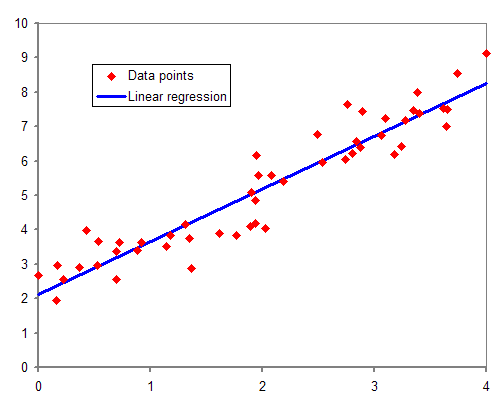

## 단순 선형 회귀

단순 선형 회귀는 하나의 독립 변수가 종속 변수에 직선의 방정식으로 표현될 수 있는 모형으로 수식은 아래와 같습니다.

$$Y=\beta_{0}+\beta_{1}X+\epsilon$$

$$X:\text{독립 변수}$$
$$Y:\text{종속 변수}$$
$$\beta_{0}:\text{절편}$$
$$\beta_{1}:\text{기울기}$$
$$\epsilon:\text{오차}$$

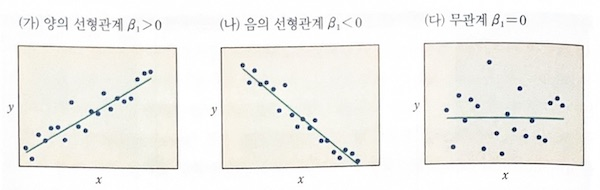

기울기가 양수이면 독립 변수와 종속 변수가 양의 상관관계를 갖고, 음수면 음의 상관관계를 갖습니다. 0이면 독립 변수와 종속 변수 사이 관계가 없습니다.

## 최소 제곱법

우리가 하고 싶은 것은 데이터로부터 회귀 식을 추정하는 것입니다. 추정된 회귀 식은 아래와 같습니다.

$$\hat{y}=b_{0}+b_{1}x$$

오차의 제곱이 최소가 되는 값을 찾으면 β0, β1에 대한 가장 그럴듯한 추정값을 구할 수 있지 않을까요? 이를 식으로 나타내면 아래와 같습니다. (b0와 b1을 각각 β0, β1의 추정값입니다.)

$$(b_{0},b_{1})=argmin\sum_{i=1}^{n}\epsilon_{i}^2=argmin\sum_{i=1}^{n}(y_{i}-\beta_{0}-\beta_{1}x_{i})^2$$

오차의 제곱을 최소로 만드는 기법이라고 하여 최소 제곱법이라고 부릅니다. 최소 제곱법을 이용하여 유도한 추정 값들은 아래와 같습니다. 

유도 과정이 궁금하신 분들은 아래 링크를 참고해주세요.  
https://evening-ds.tistory.com/36

$$b_{1}=\frac{\sum_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})}{\sum_{i=1}^{n}(x_{i}-\bar{x})^2}=r_{xy}\frac{S_{y}}{S_{x}}$$

$$b_{0}=\bar{y}-b_{1}\bar{x}$$

## 집 값 예측하기 예제

데이터 셋 링크: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

In [1]:
from utils import load_house_dataset

x_train, x_test, y_train, y_test = load_house_dataset()

In [2]:
x_train

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
20231,1972201964,20140725T000000,3,2.25,1420,983,3.0,0,0,3,8,1420,0,2006,0,98103,47.6533,-122.346,1530,1280
10934,3705900292,20150428T000000,3,2.00,1750,9239,1.0,0,0,3,8,1410,340,1989,0,98133,47.7583,-122.339,1720,7874
9063,4204400175,20150217T000000,5,3.50,2880,10000,2.0,0,3,3,8,1980,900,1991,0,98055,47.4874,-122.223,2120,9535
9702,1926049326,20150210T000000,2,1.00,1210,7140,1.5,0,0,3,6,1210,0,1921,0,98133,47.7225,-122.349,1150,7376
14791,2824600180,20141024T000000,3,2.50,2830,6000,1.0,0,3,3,9,1730,1100,1954,0,98126,47.5751,-122.378,2040,5300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8222,1954700610,20141209T000000,3,2.25,3360,7108,2.0,0,0,3,10,2770,590,1905,2004,98112,47.6187,-122.284,3450,8558
9449,3472800065,20140826T000000,4,3.00,3600,9687,2.0,0,0,4,9,3600,0,1959,1995,98004,47.6257,-122.208,2620,10400
8471,714000315,20150414T000000,3,2.75,1710,9448,1.0,0,0,3,7,1010,700,1947,0,98105,47.6693,-122.267,1960,8951
17048,7889600080,20150219T000000,3,1.00,1050,6240,1.0,0,0,5,5,1050,0,1948,0,98146,47.4933,-122.338,1410,6240


In [3]:
y_train

20231     500000.0
10934     420000.0
9063      439000.0
9702      305000.0
14791     713414.0
           ...    
8222     2193000.0
9449     1698000.0
8471      515000.0
17048     208000.0
1318      234975.0
Name: price, Length: 17290, dtype: float64

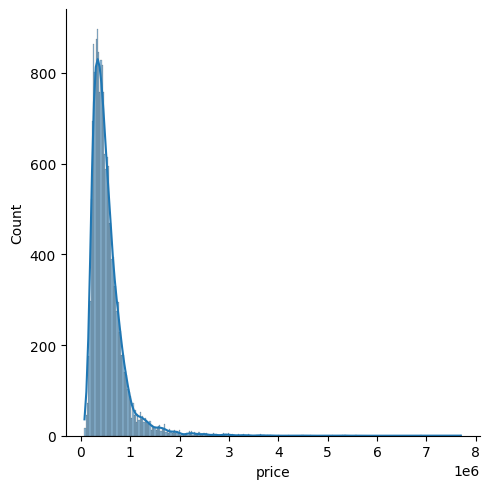

In [6]:
import seaborn as sns

sns.displot(
    y_train,
    kde=True
)

### 독립 변수 선택

price와 피어슨 상관계수가 가장 높은 변수 하나를 독립 변수로 선택하겠습니다.

In [7]:
x_train["price"] = y_train

In [10]:
x_train.corr()["price"].sort_values(ascending=False)

/var/folders/wx/2vw1xwz972zdxff5h8gzrml00000gn/T/ipykernel_49852/316005052.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  x_train.corr()["price"].sort_values(ascending=False)


price            1.000000
sqft_living      0.702426
grade            0.666802
sqft_above       0.607668
sqft_living15    0.583927
bathrooms        0.527396
view             0.388934
sqft_basement    0.321448
bedrooms         0.310092
lat              0.304623
floors           0.257845
waterfront       0.256916
yr_renovated     0.122966
sqft_lot         0.084231
sqft_lot15       0.079566
yr_built         0.054914
condition        0.037439
long             0.026008
id              -0.015848
zipcode         -0.057025
Name: price, dtype: float64

### statsmodels를 이용한 선형 회귀 모델 학습

선형 상관관계가 가장 큰 변수들 중 sqft_living을 선택하여 선형 회귀 모델을 학습시켜 보겠습니다. 먼저 scatter plot 부터 그려보겠습니다.

In [12]:
import statsmodels.api as sm
from matplotlib import pyplot as plt

In [13]:
x_train = x_train["sqft_living"]
x_test = x_test["sqft_living"]

Text(0, 0.5, 'price')

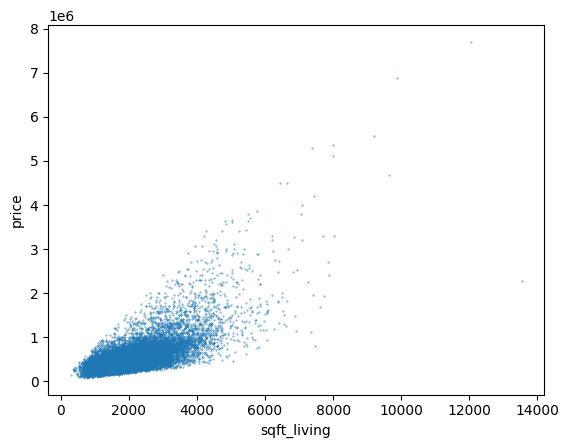

In [17]:
plt.scatter(x_train, y_train, s=0.1)
plt.xlabel("sqft_living")
plt.ylabel("price")

python statsmodels 이용하여 단순 선형 회귀 모델을 도출해보겠습니다.  statsmodels를 이용하여 선형회귀 모델을 학습시킬 경우, 상수항을 추가해주어야 합니다.  

In [18]:
x_constant_train = sm.add_constant(x_train, has_constant="add")
x_constant_train

,const,sqft_living
20231,1.0,1420
10934,1.0,1750
9063,1.0,2880
9702,1.0,1210
14791,1.0,2830
...,...,...
8222,1.0,3360
9449,1.0,3600
8471,1.0,1710
17048,1.0,1050


이제 최소 제곱법의 구현체 중 하나인 OLS를 이용해서 선형회귀 모델을 학습시켜 보겠습니다. OLS에 대한 자세한 내용이 궁금하신 분들은 아래 강의를 참고해주세요.

https://www.youtube.com/watch?v=eTTGN4FAPxk

In [30]:
model = sm.OLS(y_train, x_constant_train)
results = model.fit()

In [31]:
results.params

const         -44289.649858
sqft_living      281.436366
dtype: float64

In [32]:
const = results.params["const"]
weight = results.params["sqft_living"]
const, weight

(-44289.649858496494, 281.43636601422037)

학습한 회귀식을 시각화 해보겠습니다.

In [33]:
y_train_pred = results.predict(x_constant_train)
y_train_pred

20231    355349.989882
10934    448223.990666
9063     766247.084262
9702     296248.353019
14791    752175.265962
             ...      
8222     901336.539949
9449     968881.267793
8471     436966.536026
17048    251218.534456
1318     420080.354065
Length: 17290, dtype: float64

Text(0, 0.5, 'price')

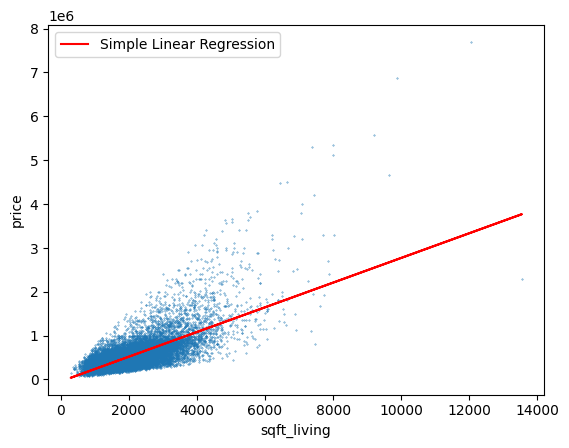

In [37]:
plt.scatter(x_train, y_train, s=0.1)
plt.plot(x_train, y_train_pred, color="red", label="Simple Linear Regression")
plt.legend()
plt.xlabel("sqft_living")
plt.ylabel("price")

### 테스트 데이터 셋에 대해 적용

train set으로 회귀 식을 도출했으니, 이제 test set에 적용해보겠습니다. 그리고 회귀 식이 얼마나 잘 test set을 설명하는지 정량적인 지표를 측정해보겠습니다.

In [40]:
x_constant_test = sm.add_constant(x_test)
y_test_pred = results.predict(x_constant_test)

Text(0, 0.5, 'price')

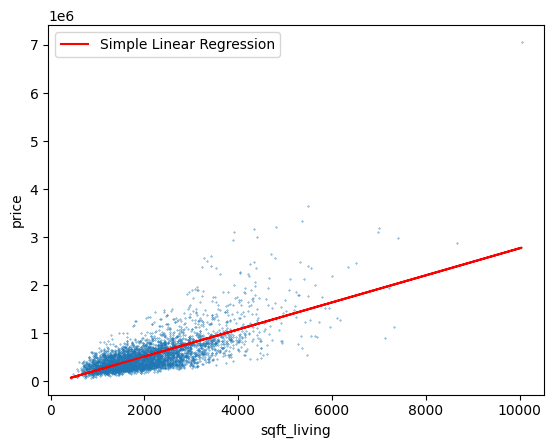

In [41]:
plt.scatter(x_test, y_test, s=0.1)
plt.plot(x_test, y_test_pred, color="red", label="Simple Linear Regression")
plt.legend()
plt.xlabel("sqft_living")
plt.ylabel("price")

In [43]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

print("train set R2:", r2_score(y_train, y_train_pred))
print("train set RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("test set R2:", r2_score(y_test, y_test_pred))
print("test set RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

train set R2: 0.49340240887483144
train set RMSE: 262086.70815707708
test set R2: 0.4905088671021405
test set RMSE: 258855.99041958785


### 결과 해석

위에서 R2, RMSE 두 가지 척도로 회귀식의 적합도를 측정하였습니다. 이는 각각 데이터의 전체 변동에서 회귀식이 설명하는 비중, 회귀식의 오차항의 제곱합의 제곱근을 의미하며, 자세한 내용은 이어지는 챕터들에서 배울 예정입니다. 이 외에도 statsmodels는 회귀식이 데이터를 얼마나 잘 설명하는 지 측정하는 여러가지 지표들을 제공해줍니다.

In [44]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 1.684e+04
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        10:43:27   Log-Likelihood:            -2.4025e+05
No. Observations:               17290   AIC:                         4.805e+05
Df Residuals:                   17288   BIC:                         4.805e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.429e+04   4921.168     -9.000      0.000   -5.39e+04   -3.46e+04
sqft_living   281.4364      2.169    129.760      0.000     277.185     285.688
==============================================================================
Omnibus:                    11803.100   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           413795.032
Skew:                           2.816   Prob(JB):                         0.00
Kurtosis:                      26.295   Cond. No.                     5.60e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

굉장히 많은 숫자가 겁을 주지만 전혀 걱정할 필요 없습니다. 이어지는 챕터들에서 모두 다룰 내용들입니다. 지금은 그냥 회귀식이 얼마나 적합한지 측정하는 지표가 많이 있다 정도로 알고 넘어가겠습니다.

## 선형 회귀 모형의 가정사항

선형 회귀 모델은 전제하는 가정사항들이 있습니다. 먼저 하나의 관측값은 회귀식을 통해 추정한 값과 오차의 합으로 계산할 수 있습니다.

$$Y_{i}=\beta_{0}+\beta_{1}X_{i}+\epsilon_{i}$$

여기서 오차항은 회귀식을 통해 추청한 값과 실제 값 사이의 차이를 의미합니다. 이 오차항에 대해서 몇 가지 가정을 전제하고 모델을 구성한 것이 선형 회귀 모델입니다.

$$ \text{1. 오차항(}\epsilon_{i}\text{)의 평균은 0이고 분산은 }\sigma^2 \text{이다. (등분산성)}$$

$$\text{2. 오차항}\epsilon_{i}\text{들은 서로 독립이다. (독립성)}$$

$$\text{3. 오차항}\epsilon_{i}\text{은 정규분포를 따른다. (정규성)}$$

위 세 가지 가정을 모두 합쳐서 수식으로 표기하면 아래와 같습니다.

$$\epsilon_{i} \sim iid\;N(0, \sigma^2)$$

해석해보면, 각각의 오차항들은 서로 독립적인 정규 분포를 따른다고 가정하는 것입니다. 이를 그림으로 그려보면 아래와 같습니다.

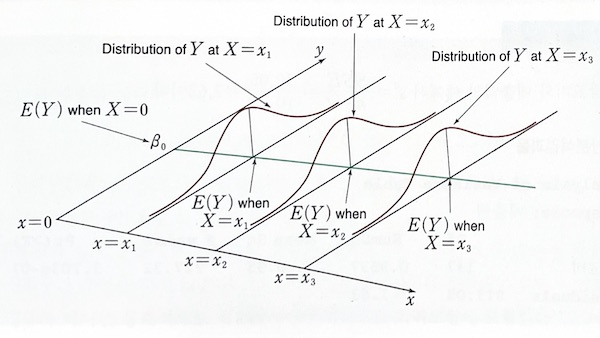

선형 회귀식을 구하는 방법으로 최소 제곱법 이외에도 많은 방법들이 존재합니다. 그런데 이런 방법들은 위 가정 사항들을 전제하고 회귀식을 구한 것입니다. 따라서 도출된 회귀식이 적합한지 검정하기 위해서는 가정 사항들이 만족되는 지를 점검해야합니다.

예제 마지막에서 살펴본 지표들에는 이런 가정이 얼마나 만족되었는 지를 측정한 결과도 있습니다. 회귀 분석을 할 경우, 단순히 모델이 얼마나 잘 예측하는 지 보다 도출된 회귀식이 얼마나 데이터를 잘 설명하는 지를 해석하는 부분이 더 중요합니다. (예측력만 놓고 따지면 다른 기법들이 훨씬 우수합니다. ex. decision tree, deep learning) 

## 정리

이번 챕터에서는 독립 변수가 1개, 종속 변수가 1개일 때 적용할 수 있는 단순 선형 회귀에 대해서 알아보았습니다. statsmodels 라이브러리를 사용해서 선형 회귀 모델을 직접 학습시켜 보았고, 결과 요약 리포트를 뽑아보았습니다. 마지막으로 선형 회귀 모델의 가정 사항에 대해서 알아보았습니다. 특히 가정 사항을 잘 이해하는 것이 이어지는 챕터들을 따라올 때 유용하므로 복습을 잘 해두시기 바랍니다.